<a href="https://colab.research.google.com/github/tanya072/Analytics-Capstone/blob/master/DataVisAss3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# To mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# importing libraries
import numpy as np
import pandas as pd
import networkx as  nx
import matplotlib.pyplot as plt

# Graph with weighted edges

In [0]:
# importing data from google drive
email = pd.read_csv ('/content/drive/My Drive/Machine Learning A2/email_T.csv')
staff = pd.read_csv ('/content/drive/My Drive/Machine Learning A2/staff.csv')

In [0]:
email.head()


,From_ID,Emails_per_month,Weight,To_ID,From_Staff_Name,From_Staff_Position,To_Staff_Name_x,To_Staff_Position_x,To_Staff_Name_y,To_Staff_Position_y
0,0,5,1,1,James,Director,David,Director,David,Director
1,0,6,1,2,James,Director,George,CEO,George,CEO
2,1,5,1,2,David,Director,George,CEO,George,CEO
3,2,25,2,3,George,CEO,Ronald,Business Development Manager,Ronald,Business Development Manager
4,2,36,2,4,George,CEO,John,Business Support Manager,John,Business Support Manager


In [0]:
staff.head()

In [0]:
from_email_staff = staff.copy();  
from_email_staff.columns = ["From_ID","From_Staff_Name","From_Staff_Position"]
from_email_staff

In [0]:
to_email_staff = staff.copy();  
to_email_staff.columns = ["To_ID","To_Staff_Name","To_Staff_Position"]
to_email_staff

In [0]:
# merging tables together
email = email.merge(from_email_staff, on="From_ID", how="left")
email.head()

In [0]:
email = email.merge(to_email_staff, on="To_ID", how="left")
email.head()

,From_ID,Emails_per_month,Weight,To_ID,From_Staff_Name,From_Staff_Position,To_Staff_Name_x,To_Staff_Position_x,To_Staff_Name_y,To_Staff_Position_y
0,0,5,1,1,James,Director,David,Director,David,Director
1,0,6,1,2,James,Director,George,CEO,George,CEO
2,1,5,1,2,David,Director,George,CEO,George,CEO
3,2,25,2,3,George,CEO,Ronald,Business Development Manager,Ronald,Business Development Manager
4,2,36,2,4,George,CEO,John,Business Support Manager,John,Business Support Manager


In [0]:
# Constructing the list of edges representing connections between IDs 

edges = email[['From_Staff_Name', 'To_Staff_Name_x']].values 
edges

In [0]:
# Creating the networkX graph from the edges array
g = nx.from_edgelist(edges)

In [0]:
# Graph statistics
len(g.nodes()), len(g.edges())

(18, 45)

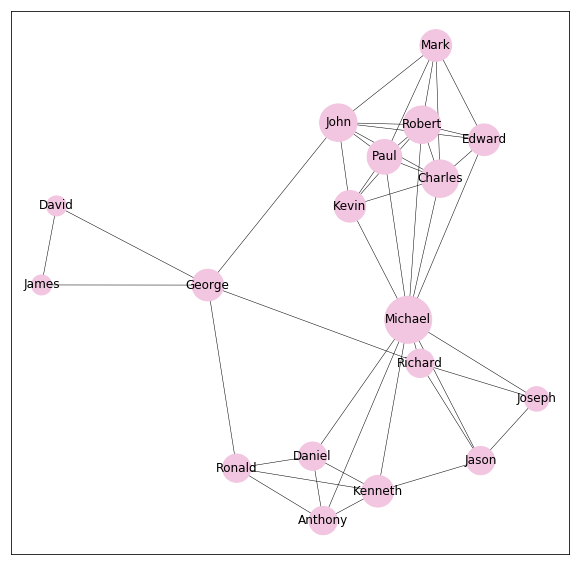

In [0]:
# The node sizes will depend on the degree of the nodes, that is, 
# the number of IDs connected to every node
deg = nx.degree(g)
sizes = [200 * deg[From_ID] for From_ID in g.nodes]

# Plot the graph
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
nx.draw_networkx(g, ax=ax, node_size=sizes, node_color = '#F2C5E0',
                font_size=12, alpha=1,
                width=.5)
#ax.set_axis_off()

In [0]:

G = nx.Graph()
G.add_edges_from(edges)
pos=nx.spring_layout(G)

nx.draw(G, pos, node_size=300, with_labels=True)
plt.show()

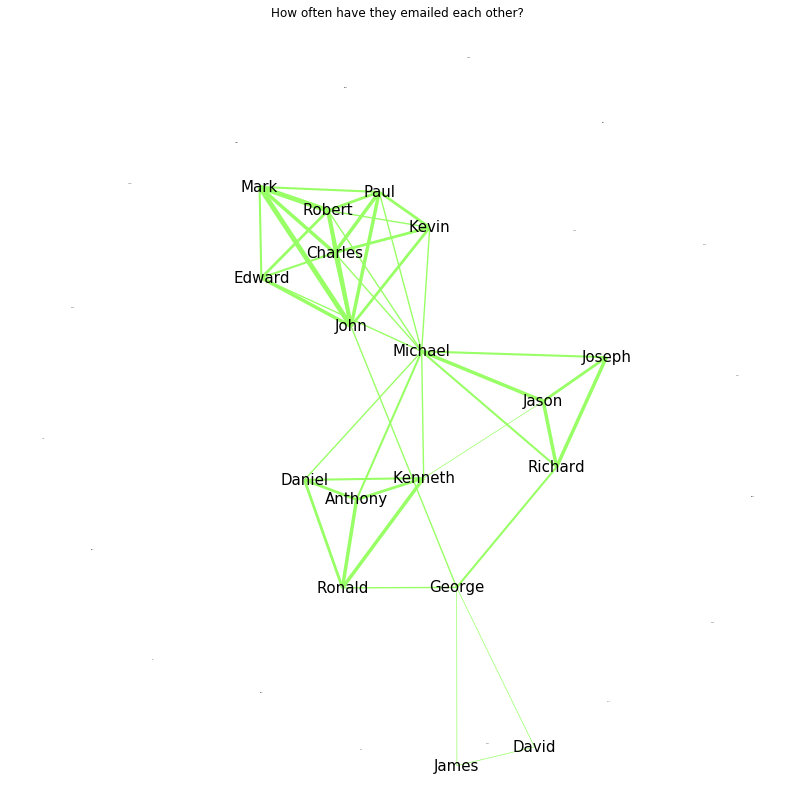

In [0]:
def plot_weighted_graph():
  "Plot a weighted graph"
  
  GW = nx.Graph() # Create a graph object called GW
  node_list = ['James', 'David', 'George', 'Ronald', 'John', 'Richard', 'Daniel', 'Kenneth', 'Anthony', 'Robert', 'Charles', 'Paul', 'Mark', 'Kevin', 'Edward', 'Joseph', 'Michael', 'Jason']
  for node in node_list:
     GW.add_node(node)
    
  # Note: You can also try a spring_layout
  #pos=nx.spring_layout(GW) 
  #nx.draw_networkx_nodes(GW,pos,node_color='#F2C5E0',node_size=500)
  deg = nx.degree(GW)
  sizes = [200 * deg[node_name] for node_name in GW.nodes]
  fig, ax = plt.subplots(1, 1, figsize=(14, 14))

  nx.draw_networkx(GW, ax=ax,node_size=sizes,
                font_size=1)
  
  labels = {}
  for node_name in node_list:
      labels[str(node_name)] =str(node_name)
  nx.draw_networkx_labels(GW, pos, labels, font_color='black', font_size=15)
  
  GW.add_edge(node_list[0],node_list[1],weight=1)  # James   David
  GW.add_edge(node_list[0],node_list[2],weight=1)  # James   George
  GW.add_edge(node_list[1],node_list[2],weight=1)  # David   George
  GW.add_edge(node_list[2],node_list[3],weight=2)  # George  Ronald
  GW.add_edge(node_list[2],node_list[4],weight=2)  # George  John
  GW.add_edge(node_list[2],node_list[5],weight=3)  # George  Richard
  GW.add_edge(node_list[3],node_list[6],weight=4)  # George  Daniel
  GW.add_edge(node_list[3],node_list[7],weight=5)  # George  Kenneth
  GW.add_edge(node_list[3],node_list[8],weight=5)  # George  Anthony
  GW.add_edge(node_list[4],node_list[9],weight=6)  # John    Robert
  GW.add_edge(node_list[4],node_list[10],weight=4) # John    Charles
  GW.add_edge(node_list[4],node_list[11],weight=5) # John    Paul
  GW.add_edge(node_list[4],node_list[12],weight=7) # John    Mark
  GW.add_edge(node_list[4],node_list[13],weight=4) # John    Kevin
  GW.add_edge(node_list[4],node_list[14],weight=5) # John    Edward
  GW.add_edge(node_list[5],node_list[15],weight=5) # Richard Joseph
  GW.add_edge(node_list[5],node_list[16],weight=3) # Richard Michael
  GW.add_edge(node_list[5],node_list[17],weight=5) # Richard Jason
  GW.add_edge(node_list[6],node_list[7],weight=3)  # Daniel  Kenneth
  GW.add_edge(node_list[6],node_list[8],weight=4)  # Daniel  Anthony
  GW.add_edge(node_list[7],node_list[8],weight=4)  # Kenneth Anthony
  GW.add_edge(node_list[9],node_list[10],weight=2) # Robert  Charles
  GW.add_edge(node_list[9],node_list[11],weight=4) # Robert  Paul
  GW.add_edge(node_list[9],node_list[12],weight=7) # Robert  Mark
  GW.add_edge(node_list[9],node_list[13],weight=2) # Robert  Kevin
  GW.add_edge(node_list[9],node_list[14],weight=4) # Robert  Edward
  GW.add_edge(node_list[10],node_list[11],weight=5)# Charles Paul
  GW.add_edge(node_list[10],node_list[12],weight=5)# Charles Mark
  GW.add_edge(node_list[10],node_list[13],weight=4)# Charles Kevin
  GW.add_edge(node_list[10],node_list[14],weight=3)# Charles Edward
  GW.add_edge(node_list[11],node_list[12],weight=3)# Paul    Mark
  GW.add_edge(node_list[11],node_list[13],weight=4)# Paul    Kevin
  GW.add_edge(node_list[12],node_list[14],weight=3)# Mark    Edward
  GW.add_edge(node_list[15],node_list[16],weight=3)# Joseph  Michael
  GW.add_edge(node_list[15],node_list[17],weight=4)# Joseph  Jason
  GW.add_edge(node_list[16],node_list[17],weight=5)# Michael Jason
  GW.add_edge(node_list[16],node_list[6],weight=2) # Michael Daniel
  GW.add_edge(node_list[16],node_list[7],weight=2) # Michael Kenneth
  GW.add_edge(node_list[16],node_list[8],weight=3) # Michael Anthony
  GW.add_edge(node_list[16],node_list[9],weight=2) # Michael Robert
  GW.add_edge(node_list[16],node_list[10],weight=2)# Michael Charles
  GW.add_edge(node_list[16],node_list[11],weight=2)# Michael Paul
  GW.add_edge(node_list[16],node_list[13],weight=2)# Michael Kevin
  GW.add_edge(node_list[16],node_list[14],weight=2)# Michael Edward
  GW.add_edge(node_list[17],node_list[7],weight=1) # Jason   Kenneth
  
  
  all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
  for (node1,node2,data) in GW.edges(data=True):
      all_weights.append(data['weight']) #we'll use this when determining
 
  unique_weights = list(set(all_weights))
  
  # Plot the edges one by one:
  for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in GW.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        
        width = weight*len(node_list)*6.0/sum(all_weights)
        nx.draw_networkx_edges(GW,pos,edgelist=weighted_edges,  edge_color='#99FF66',width=width)
  #Plot the graph
  plt.axis('off')
  plt.title('How often have they emailed each other?')
  #plt.savefig("chess_legends.png") 
  plt.show() 
  
if __name__=='__main__':
    plot_weighted_graph()